In [ ]:
!pip install "pandas<2.0.0"
!pip install pyLDAvis

Let's break down what each part of the code is doing:

1. **Importing Libraries:**
   - The code starts by importing several Python libraries that are necessary for different aspects of text analysis, including Gensim, scikit-learn, spaCy, and others.

2. **Setting up Logging:**
   - It configures logging to control the verbosity of Gensim's log messages. In this case, it sets the logging level to ERROR, which means only error messages will be displayed.

3. **Suppressing Warnings:**
   - It suppresses deprecation warnings using `warnings.filterwarnings`. This is used to hide deprecated function or class warnings that might be generated during the execution of the code.

4. **Importing a Dataset:**
   - It imports a dataset using scikit-learn's `fetch_20newsgroups` function. This dataset is commonly used for text classification and includes newsgroup documents organized into categories.

5. **Importing Necessary Modules:**
   - The code imports several modules from Gensim and other libraries:
     - `gensim.corpora`: Provides utilities for working with text corpora.
     - `gensim.utils`: Includes utility functions for text preprocessing.
     - `gensim.models`: Contains various topic modeling algorithms, including LDA.
     - `nltk`: The Natural Language Toolkit library, often used for natural language processing tasks like tokenization.
     - `spacy`: A library for more advanced text processing, such as lemmatization.

6. **Importing Plotting Tools:**
   - It imports libraries for data visualization, including `pyLDAvis` and `matplotlib`. `pyLDAvis` is a tool for visualizing the results of topic modeling.

7. **Other Imports:**
   - `numpy` and `pandas` are imported for general data manipulation tasks.

8. **Text Processing Utilities:**
   - Various text preprocessing and cleaning functions, such as tokenization and regular expressions, can be expected to follow in the code. However, they are not shown in the provided snippet.


In [ ]:
# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import re
import string
import numpy as np
import pandas as pd
import nltk
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim_models  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

# dataset
from sklearn.datasets import fetch_20newsgroups

1. **Loading Training Data:**
   - `news_group_train = fetch_20newsgroups(subset='train')` fetches the training subset of the 20 Newsgroups dataset using scikit-learn's `fetch_20newsgroups` function. This dataset contains newsgroup documents categorized into different topics.
   - `news_group_data_train` stores the text content of the training documents.
   - `news_group_target_names_train` contains the names of the newsgroup categories.
   - `news_group_target_train` contains the target labels (numeric category IDs) for the training documents.

2. **Creating a DataFrame from Training Data:**
   - `news_train` is a Pandas DataFrame created to organize the training data. It has two columns: "news," which contains the text content of the documents, and "class," which contains the numeric category labels.

3. **Loading Test Data:**
   - `news_group_test = fetch_20newsgroups(subset='test')` fetches the test subset of the 20 Newsgroups dataset, similar to what was done for the training data.
   - `news_group_data_test` stores the text content of the test documents.
   - `news_group_target_names_test` contains the names of the newsgroup categories for the test set.
   - `news_group_target_test` contains the target labels (numeric category IDs) for the test documents.

4. **Creating a DataFrame from Test Data:**
   - `news_test` is another Pandas DataFrame created to organize the test data, similar to `news_train`.

5. **Merging Training and Test Data:**
   - `frames = [news_train, news_test]` creates a list containing the two DataFrames: one for training data and one for test data.
   - `news_df = pd.concat(frames).reset_index(drop=True)` concatenates these DataFrames into a single DataFrame called `news_df`. The `reset_index(drop=True)` part resets the index of the merged DataFrame to start from 0.

6. **Printing Dataset Shape and a Sample Record:**
   - `print(news_df.shape)` prints the shape of the merged dataset, indicating the number of rows (documents) and columns (features).
   - `news_df.head(1)` prints the first record (row) of the merged dataset. This is done to provide an example of what the data looks like.

In [4]:
# loading train dataset
news_group_train = fetch_20newsgroups(subset='train')
news_group_data_train = news_group_train.data
news_group_target_names_train = news_group_train.target_names
news_group_target_train = news_group_train.target

# Creating a dataframe from the loaded data
news_train = pd.DataFrame({'news': news_group_data_train,
                        'class': news_group_target_train})

#Loading test data
news_group_test = fetch_20newsgroups(subset='test')
news_group_data_test = news_group_test.data
news_group_target_names_test = news_group_test.target_names
news_group_target_test = news_group_test.target

# Creating a dataframe from the loaded data
news_test = pd.DataFrame({'news': news_group_data_test,
                        'class': news_group_target_test})
#Merging both dataset
frames = [news_train,news_test]
news_df = pd.concat(frames).reset_index(drop=True)

print(news_df.shape)
news_df.head(1)

(18846, 2)


,news,class
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,7


# Removing Email
The purpose of this code is to remove email addresses from the text data in the "news" column of the DataFrame. This can be useful when you want to analyze or model text data but want to exclude email addresses, which may not be relevant to your analysis or may be considered noise. Here's a step-by-step explanation of the code:

1. **Defining the `remove_email` Function:**
   - `def remove_email(text):` defines a Python function called `remove_email` that takes a single argument `text`, which is assumed to be a string.

2. **Splitting the Text into Words:**
   - `items = text.split()` splits the input `text` into a list of words. It uses whitespace as the default delimiter, so each word is separated based on spaces.

3. **Filtering Out Email Addresses:**
   - `[item for item in text.split() if '@' not in item]` is a list comprehension that iterates through each word in the split text (`text.split()`) and includes it in the output list only if it does not contain the "@" symbol. This effectively filters out any word that looks like an email address.

4. **Joining Filtered Words Back into Text:**
   - `" ".join(...)` takes the list of filtered words and joins them back into a single string with space separators. This reconstructed string contains all the words from the original text except for those that looked like email addresses.

5. **Applying the Function to the DataFrame:**
   - `news_df["news"] = news_df["news"].apply(lambda text: remove_email(text))` applies the `remove_email` function to every element in the "news" column of the `news_df` DataFrame using the `.apply()` method. This effectively replaces the original text in the "news" column with the text where email addresses have been removed.

6. **Displaying the Modified DataFrame:**
   - `news_df.head(1)` prints the first record (row) of the modified DataFrame to show an example of what the data looks like after the email addresses have been removed.


In [5]:
def remove_email(text):
    items = text.split()
    return " ".join([item for item in text.split() if '@' not in item])
news_df["news"] = news_df["news"].apply(lambda text: remove_email(text))
news_df.head(1)

,news,class
0,From: (where's my thing) Subject: WHAT car is ...,7


# Lowercasing
The code is performing lowercase conversion on the text data in the "news" column of the `news_df` Pandas DataFrame. Lowercasing is a common text preprocessing step in natural language processing and text analysis. It helps ensure that text data is standardized and avoids issues where the same word with different cases is treated as distinct tokens (e.g., "Word" and "word"). Here's a breakdown of what this code does:

1. **Selecting the "news" Column:**
   - `news_df["news"]` selects the "news" column of the `news_df` DataFrame, which presumably contains text data.

2. **Lowercasing the Text:**
   - `.str.lower()` is a string method provided by Pandas. It converts all the text in the selected column to lowercase. This means that all uppercase letters in the text are changed to their lowercase equivalents.

3. **Updating the DataFrame:**
   - `news_df["news"] = ...` assigns the lowercase-converted text back to the "news" column of the DataFrame. As a result, the original text in that column is replaced with the lowercase version.

4. **Displaying the Modified DataFrame:**
   - `news_df.head(1)` prints the first record (row) of the modified DataFrame to show an example of what the data looks like after the lowercase conversion.

In [6]:
news_df["news"] = news_df["news"].str.lower()
news_df.head(1)

,news,class
0,from: (where's my thing) subject: what car is ...,7


# Stopword removal
The code is performing stopword removal on the text data in the "news" column of the `news_df` Pandas DataFrame. Stopword removal is a common text preprocessing step in natural language processing tasks. Stopwords are words that are very common in a language (e.g., "the," "and," "in") but often do not carry significant meaning in the context of text analysis. Removing stopwords can reduce the dimensionality of the text data and focus the analysis on more meaningful words. Here's a breakdown of what this code does:

1. **Importing NLTK's Stopwords:**
   - `from nltk.corpus import stopwords` imports the stopwords list from the NLTK (Natural Language Toolkit) library, which contains common English stopwords.

2. **Creating a Set of Stopwords:**
   - `STOPWORDS = set(stopwords.words('english'))` creates a set called `STOPWORDS` that contains the English stopwords from NLTK. Using a set data structure allows for faster membership checking, which is useful when filtering stopwords.

3. **Defining the `remove_stopwords` Function:**
   - `def remove_stopwords(text):` defines a Python function called `remove_stopwords` that takes a single argument `text`, which is assumed to be a string.

4. **Tokenizing and Filtering Stopwords:**
   - `[word for word in str(text).split() if word not in STOPWORDS]` is a list comprehension that tokenizes the input `text` into words using `split()`, and includes each word in the output list only if it is not found in the `STOPWORDS` set. This effectively removes stopwords from the text.

5. **Joining Filtered Words Back into Text:**
   - `" ".join(...)` takes the list of filtered words and joins them back into a single string with space separators. This reconstructed string contains the text with stopwords removed.

6. **Applying the Function to the DataFrame:**
   - `news_df["news"] = news_df["news"].apply(lambda text: remove_stopwords(text))` applies the `remove_stopwords` function to every element in the "news" column of the `news_df` DataFrame using the `.apply()` method. This replaces the original text in the "news" column with the text where stopwords have been removed.

7. **Displaying the Modified DataFrame:**
   - `news_df.head(1)` prints the first record (row) of the modified DataFrame to show an example of what the data looks like after the stopwords have been removed.



In [9]:
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

news_df["news"] = news_df["news"].apply(lambda text: remove_stopwords(text))
news_df.head(1)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,news,class
0,from: (where's thing) subject: car this!? nntp...,7


# Removal of Punctuations
The code is performing punctuation removal on the text data in the "news" column of the `news_df` Pandas DataFrame. Punctuation removal is a common text preprocessing step in natural language processing and text analysis. Removing punctuation can help standardize the text data and remove characters that are often not critical for many text analysis tasks, such as text classification or topic modeling. However, the choice to remove punctuation should depend on the specific requirements of your analysis or model. Here's a breakdown of what this code does:

1. **Defining the `PUNCT_TO_REMOVE` String:**
   - `PUNCT_TO_REMOVE = string.punctuation` creates a string containing all punctuation characters defined in the `string` module. This string includes characters like periods, commas, exclamation marks, and so on.

2. **Defining the `remove_punctuation` Function:**
   - `def remove_punctuation(text):` defines a Python function called `remove_punctuation` that takes a single argument `text`, which is assumed to be a string.

3. **Removing Punctuation:**
   - `text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))` is used to remove punctuation from the input `text`. The `str.maketrans('', '', PUNCT_TO_REMOVE)` creates a translation table that specifies how characters in `PUNCT_TO_REMOVE` should be mapped to `None`, effectively removing them.

4. **Applying the Function to the DataFrame:**
   - `news_df["news"] = news_df["news"].apply(lambda text: remove_punctuation(text))` applies the `remove_punctuation` function to every element in the "news" column of the `news_df` DataFrame using the `.apply()` method. This replaces the original text in the "news" column with the text where punctuation has been removed.

5. **Displaying the Modified DataFrame:**
   - `news_df.head(1)` prints the first record (row) of the modified DataFrame to show an example of what the data looks like after punctuation removal.



In [10]:
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

news_df["news"] = news_df["news"].apply(lambda text: remove_punctuation(text))
news_df.head(1)

,news,class
0,from wheres thing subject car this nntpposting...,7


This code is performing several operations on the text data contained in the "news" column of the `news_df` Pandas DataFrame and then converting it into a list of cleaned text documents. The end result is that the `data` list contains cleaned and preprocessed text documents with new line characters removed and single quotes removed. This type of data preprocessing is common before applying text analysis techniques, such as text classification or topic modeling, to ensure that the text data is in a clean and consistent format. Here's a breakdown of what each part of the code does:

1. **Converting to a List:**
   - `data = news_df["news"].values.tolist()` extracts the "news" column from the DataFrame and converts it into a Python list named `data`. Each element in the list corresponds to a text document.

2. **Removing New Line Characters:**
   - `data = [re.sub('\s+', ' ', sent) for sent in data]` uses a list comprehension to iterate through each text document (`sent`) in the `data` list. It applies a regular expression (`\s+`) to find one or more whitespace characters (including newline characters) and replaces them with a single space. This operation removes extra spaces and new line characters from each document.

3. **Removing Single Quotes:**
   - `data = [re.sub("\'", "", sent) for sent in data]` again uses a list comprehension to iterate through each text document (`sent`) in the `data` list. It applies a regular expression (`\'`) to find and remove single quotation marks from each document.

4. **Printing the First Document:**
   - `print(data[:1])` prints the first document (the first element of the `data` list) as an example to check the result.



In [11]:
# Convert to list
data = news_df["news"].values.tolist()

# Remove new line characters
data = [re.sub('\s+', ' ', sent) for sent in data]

# Remove distracting single quotes
data = [re.sub("\'", "", sent) for sent in data]

print(data[:1])

['from wheres thing subject car this nntppostinghost rac3wamumdedu organization university maryland college park lines 15 wondering anyone could enlighten car saw day 2door sports car looked late 60s early 70s called bricklin doors really small addition front bumper separate rest body know anyone tellme model name engine specs years production car made history whatever info funky looking car please email thanks il brought neighborhood lerxst ']


This code defines a function called `sent_to_words` and then applies this function to a list of text sentences (`data`) to convert them into lists of words. It uses Gensim's `simple_preprocess` function for word tokenization and also removes punctuation. Here's a step-by-step explanation of what this code does:

1. **Defining the `sent_to_words` Function:**
   - `def sent_to_words(sentences):` defines a Python generator function called `sent_to_words` that takes a list of sentences (`sentences`) as input.

2. **Iterating Over Sentences:**
   - `for sentence in sentences:` starts a loop that iterates through each sentence in the input `sentences`.

3. **Tokenizing and Removing Punctuation:**
   - `gensim.utils.simple_preprocess(str(sentence), deacc=True)` tokenizes the input sentence into words using Gensim's `simple_preprocess` function. The `deacc=True` argument also removes diacritics (accented characters) and punctuation from the words.

4. **Yielding Lists of Words:**
   - `yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))` yields each tokenized sentence as a list of words. The `yield` statement turns the function into a generator, which can be iterated over to produce one list of words at a time.

5. **Converting the Generator to a List:**
   - `data_words = list(sent_to_words(data))` converts the generator produced by `sent_to_words` into a list of lists of words. Each element of `data_words` corresponds to a document in `data`, and each document is represented as a list of its words.

6. **Printing the First Document:**
   - `print(data_words[:1])` prints the words of the first document (the first element of `data_words`) as an example to check the result.
.

In [12]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

print(data_words[:1])

[['from', 'wheres', 'thing', 'subject', 'car', 'this', 'nntppostinghost', 'rac', 'wamumdedu', 'organization', 'university', 'maryland', 'college', 'park', 'lines', 'wondering', 'anyone', 'could', 'enlighten', 'car', 'saw', 'day', 'door', 'sports', 'car', 'looked', 'late', 'early', 'called', 'bricklin', 'doors', 'really', 'small', 'addition', 'front', 'bumper', 'separate', 'rest', 'body', 'know', 'anyone', 'tellme', 'model', 'name', 'engine', 'specs', 'years', 'production', 'car', 'made', 'history', 'whatever', 'info', 'funky', 'looking', 'car', 'please', 'email', 'thanks', 'il', 'brought', 'neighborhood', 'lerxst']]


This code snippet is preparing and applying various natural language processing (NLP) techniques to the text data in `data_words`. These functions and models are commonly used in text preprocessing and feature extraction for natural language processing tasks like topic modeling and text classification. The goal is to transform the raw text data into a more structured format that is easier to analyze and model. The bigram and trigram models help capture multi-word phrases, and lemmatization helps reduce the dimensionality of the text data by converting words to their canonical forms. It performs the following tasks:

1. **Building Bigram and Trigram Models:**
   - `bigram` and `trigram` are Gensim models for identifying and building bigrams (two-word phrases) and trigrams (three-word phrases) in the text data. They are constructed using the `gensim.models.Phrases` function.
   - The `min_count` parameter specifies the minimum number of occurrences needed to consider a phrase as a bigram or trigram.
   - The `threshold` parameter is used to control how aggressively phrases are detected.

2. **Creating Bigram and Trigram Modifiers:**
   - `bigram_mod` and `trigram_mod` are Gensim `Phraser` objects that can be used to apply the bigram and trigram models to text data efficiently.

3. **Defining Functions for Making Bigrams and Trigrams:**
   - `make_bigrams` and `make_trigrams` are functions that use the bigram and trigram modifiers to transform text data into lists of bigrams and trigrams.

4. **Lemmatization Function:**
   - `lemmatization` is a function that performs lemmatization on the text data. Lemmatization reduces words to their base or dictionary form (e.g., "running" to "run"). It uses the spaCy library (`nlp` object) for lemmatization.
   - The function retains only lemmas that have part-of-speech tags specified in `allowed_postags` (NOUN, ADJ, VERB, ADV). Other parts of speech are discarded.



In [13]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent))
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

This code continues the text preprocessing pipeline by forming bigrams, initializing the spaCy 'en' model, and performing lemmatization. The result of this code will be a list of lists where each inner list contains lemmatized words for a document, and only words with the specified POS tags are retained. Additionally, the text data has bigrams included, which can capture important multi-word phrases. Here's a breakdown of what each part of the code does:

1. **Form Bigrams:**
   - `data_words_bigrams = make_bigrams(data_words)` forms bigrams (two-word phrases) from the tokenized text data in `data_words`. The `make_bigrams` function applies the bigram modifier (`bigram_mod`) created earlier to transform the text data into a list of lists containing bigrams.

2. **Initialize spaCy Model:**
   - `nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])` initializes the spaCy 'en_core_web_sm' model. This step is the same as in the previous code snippet and is responsible for loading the spaCy model for further text processing.

3. **Lemmatization with Specific Part-of-Speech (POS) Tags:**
   - `data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])` performs lemmatization on the `data_words_bigrams` variable, which now contains text data with bigrams included.
   - Lemmatization is done using the spaCy model (`nlp`) and keeps only lemmas associated with specific POS tags ('NOUN', 'ADJ', 'VERB', 'ADV'). Other parts of speech are excluded.

4. **Printing the Lemmatized Data:**
   - `print(data_lemmatized[:1])` prints the lemmatized data for the first document (the first element of the `data_lemmatized` list) as an example to check the result.



In [14]:
# Form Bigrams
data_words_bigrams = make_bigrams(data_words)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

[['thing', 'subject', 'car', 'university', 'park', 'line', 'wonder', 'enlighten', 'car', 'see', 'day', 'door', 'sport', 'car', 'look', 'late', 'early', 'call', 'door', 'really', 'small', 'addition', 'separate', 'rest', 'body', 'know', 'model', 'name', 'engine', 'spec', 'year', 'production', 'car', 'make', 'history', 'info', 'funky', 'look', 'car', 'email', 'thank', 'bring', 'neighborhood', 'lerxst']]


This code is performing topic modeling using Latent Dirichlet Allocation (LDA) on the preprocessed text data. After running this code, you will have an LDA model (`lda_model`) that has identified topics in the text data. Each document in the corpus can be represented as a mixture of these topics. You can further analyze and visualize the results to understand the topics and their distribution in the corpus. Here's a step-by-step explanation of what each part of the code does:

1. **Create a Dictionary:**
   - `dictionary_LDA = corpora.Dictionary(data_lemmatized)` creates a Gensim dictionary from the lemmatized text data (`data_lemmatized`). This dictionary associates each unique word in the corpus with a unique numerical ID.

2. **Create a Corpus:**
   - `texts = data_lemmatized` assigns the lemmatized text data to a variable named `texts`. This variable is used to create the corpus in the next step.

3. **Create a Term-Document Frequency (TF) Corpus:**
   - `corpus = [dictionary_LDA.doc2bow(data_lemmatized) for data_lemmatized in data_lemmatized]` creates a TF (Term Frequency) corpus. It represents each document as a list of word IDs and their corresponding frequencies in the dictionary. This is the format expected by the LDA model.

4. **Define the Number of Topics and Train the LDA Model:**
   - `num_topics = 20` specifies the number of topics you want the LDA model to identify.
   - `lda_model = gensim.models.LdaModel(corpus, num_topics=num_topics, id2word=dictionary_LDA, passes=4, alpha=[0.01]*num_topics, eta=[0.01]*len(dictionary_LDA.keys()))` trains the LDA model on the TF corpus. Parameters like `alpha` and `eta` control the prior parameters for the model. `passes` specifies how many times the algorithm goes through the entire corpus.

5. **View the Corpus (Optional):**
   - The commented-out code `# print(corpus[:1])` can be used to print the TF representation of the first document in the corpus.
   
6. **View the Human-Readable Format of the Corpus (Optional):**
   - The commented-out code `# [[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]` can be used to view the human-readable format of the TF corpus, where words are displayed along with their frequencies in the document.



In [15]:
# Create Dictionary
dictionary_LDA = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [dictionary_LDA.doc2bow(data_lemmatized) for data_lemmatized in data_lemmatized]
num_topics = 20
lda_model = gensim.models.LdaModel(corpus, num_topics=num_topics, id2word=dictionary_LDA, passes=4, alpha=[0.01]*num_topics, \
                                   eta=[0.01]*len(dictionary_LDA.keys()))

The code is meant to print the top words associated with each of the identified topics in your Latent Dirichlet Allocation (LDA) model. It's a common step in topic modeling to understand the topics better. In this code snippet:

- The `lda_model.show_topics` method is used to retrieve the top words associated with each topic.
- The `formatted=True` argument ensures that the output is in a human-readable format.
- `num_topics=num_topics` specifies the number of topics to display.
- `num_words=10` specifies that you want to print the top 10 words for each topic.

In [16]:
for i,topic in lda_model.show_topics(formatted=True, num_topics=num_topics, num_words=10):
    print(str(i)+": "+ topic)
    print()

0: 0.058*"line" + 0.042*"subject" + 0.039*"organization" + 0.023*"email" + 0.022*"nntppostinghost" + 0.019*"sale" + 0.015*"thank" + 0.015*"price" + 0.014*"know" + 0.014*"university"

1: 0.015*"study" + 0.011*"article" + 0.010*"option" + 0.010*"subject" + 0.009*"organization" + 0.009*"write" + 0.008*"line" + 0.008*"research" + 0.008*"scientific" + 0.007*"alarm"

2: 0.012*"armenian" + 0.009*"say" + 0.006*"people" + 0.005*"president" + 0.005*"government" + 0.005*"war" + 0.005*"report" + 0.005*"year" + 0.005*"jewish" + 0.005*"muslim"

3: 0.022*"battery" + 0.017*"light" + 0.015*"temperature" + 0.013*"lead" + 0.013*"line" + 0.012*"wire" + 0.011*"circuit" + 0.011*"use" + 0.009*"unit" + 0.009*"power"

4: 0.016*"write" + 0.012*"article" + 0.011*"line" + 0.010*"subject" + 0.007*"organization" + 0.007*"water" + 0.007*"body" + 0.006*"use" + 0.005*"people" + 0.005*"eat"

5: 0.015*"planet" + 0.014*"earth" + 0.011*"space" + 0.011*"moon" + 0.010*"system" + 0.009*"energy" + 0.009*"orbit" + 0.008*"solar

This code is extracting the topic distributions for each document in the corpus and then converting these distributions into a Pandas DataFrame. The `features` DataFrame will contain the topic distributions for each document, making it suitable for further analysis, visualization, or as input to other machine learning models for tasks such as document clustering or classification. Each row represents a document, and the values in each column represent the strength or weight of a particular topic in that document. Here's an explanation of each part of the code:

1. **Extracting Topic Distributions:**
   - `topics = [lda_model[corpus[i]] for i in range(len(data))]` iterates through each document in the corpus (`corpus`) and uses the trained LDA model (`lda_model`) to extract the topic distribution for each document. The result is a list of topic distributions, where each distribution is a list of tuples with topic IDs and their corresponding weights.

2. **Defining the `topics_document_to_dataframe` Function:**
   - `topics_document_to_dataframe` is a custom function that takes the topic distribution for a single document (`topics_document`) and the total number of topics (`num_topics`) as inputs.
   - Inside the function, it initializes an empty Pandas DataFrame `res` with columns representing each topic.
   - It then iterates through the topic distribution for the document, where each tuple contains a topic ID and its weight.
   - For each topic, it assigns the weight to the corresponding column in the DataFrame.
   - The function returns this DataFrame.

3. **Creating the Final DataFrame of Topic Distributions:**
   - `features=pd.concat([topics_document_to_dataframe(topics_document, num_topics=num_topics) for topics_document in topics])` applies the `topics_document_to_dataframe` function to each topic distribution in the `topics` list using a list comprehension. This results in a list of DataFrames, each representing the topic distribution for one document.
   - `pd.concat` is used to concatenate these DataFrames into a single DataFrame called `features`. This DataFrame will have one row per document, with each column representing a topic and the corresponding weight.
   - `.reset_index(drop=True)` resets the index of the final DataFrame so that it starts from 0.
   - `.fillna(0)` fills any missing values (NaN) with 0, which might occur if a document doesn't have a certain topic assigned to it.



In [17]:
topics = [lda_model[corpus[i]] for i in range(len(data))]
def topics_document_to_dataframe(topics_document, num_topics):
    res = pd.DataFrame(columns=range(num_topics))
    for topic_weight in topics_document:
        res.loc[0, topic_weight[0]] = topic_weight[1]
    return res
features=pd.concat([topics_document_to_dataframe(topics_document, num_topics=num_topics) for topics_document in topics]) \
  .reset_index(drop=True).fillna(0)

This code adds additional columns to the `features_df` DataFrame and includes information from the original `news_df` DataFrame. The result is a DataFrame (`features_df`) that contains the topic distributions for each document, the original text data in the 'news' column, and class labels in the 'class' column. This combined DataFrame can be useful for various tasks, such as supervised learning where you want to use both the topic features and the original text data for classification or regression tasks. Here's an explanation of each part of the code:

1. **Adding the 'news' Column:**
   - `features_df['news'] = news_df['news']` adds a new column to the `features_df` DataFrame called 'news' and populates it with the values from the 'news' column of the original `news_df` DataFrame. This column likely contains the original text data.

2. **Adding the 'class' Column:**
   - `features_df['class'] = news_df['class']` adds another new column to the `features_df` DataFrame called 'class' and populates it with the values from the 'class' column of the original `news_df` DataFrame. This column likely contains class labels or categories associated with each document.

3. **Printing the DataFrame:**
   - `features_df.head(1)` prints the first row of the modified `features_df` DataFrame to show an example of what the data looks like after adding the 'news' and 'class' columns.



In [18]:
features_df=pd.DataFrame(features)
features_df['news']=news_df['news']
features_df['class']=news_df['class']
features_df.head(1)

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,news,class
0,0.167364,0.037038,0.0,0.0,0.0,0.0,0.0,0.0,0.702489,0.0,...,0.0,0.0,0.0,0.089316,0.0,0.0,0.0,0.0,from wheres thing subject car this nntpposting...,7


The code is splitting your data into training and testing sets using scikit-learn's `train_test_split` function. These sets are ready for use in machine learning models, allowing you to train and evaluate models on the provided data. Here's an explanation of what each part of the code does:

1. **Input Data and Target Variable Selection:**
   - `features_df[features_df.columns[0:-2]]` selects all columns from the `features_df` DataFrame except the last two columns. These columns are treated as the input features (`X`).

2. **Target Variable Selection:**
   - `features_df['class']` selects the 'class' column from the `features_df` DataFrame, which likely contains the target variable or class labels (`y`).

3. **Splitting the Data:**
   - `train_test_split` is used to split the input features and target variable into training and testing sets.
   - `X_train, X_test, y_train, y_test` are the variables that will hold the resulting training and testing sets.
   - `test_size=0.33` specifies that 33% of the data should be allocated for testing, while 67% will be used for training.
   - `random_state=42` sets the random seed for reproducibility. If you use the same seed (42 in this case), you should get the same split each time you run the code.
   - `stratify=features_df['class']` is used to ensure that the class distribution in the training and testing sets is similar to the original dataset. This is particularly useful when dealing with imbalanced datasets, as it helps maintain a proportional representation of classes in both sets.

After running this code, you will have four variables:

- `X_train`: The training set of input features.
- `X_test`: The testing set of input features.
- `y_train`: The training set of target labels.
- `y_test`: The testing set of target labels.

In [19]:
X_train, X_test, y_train, y_test = train_test_split(features_df[features_df.columns[0:-2]], features_df['class'], test_size=0.33, random_state=42,stratify=features_df['class'])

The code uses scikit-learn to train a Logistic Regression classifier and evaluate its performance on the testing data. The result of `clf.score(X_test, y_test)` represents the accuracy of the Logistic Regression model on the testing data. It tells you the proportion of correctly predicted labels in the testing set. Keep in mind that accuracy is just one metric to evaluate model performance, and depending on your specific problem and dataset, you might want to consider other metrics such as precision, recall, F1-score, or confusion matrix for a more comprehensive evaluation. Here's a breakdown of each part of the code:

1. **Import Logistic Regression:**
   - `from sklearn.linear_model import LogisticRegression` imports the Logistic Regression classifier from scikit-learn.

2. **Initialize and Train the Classifier:**
   - `clf = LogisticRegression(random_state=0, max_iter=20000)` initializes a Logistic Regression classifier with a specified random seed (`random_state=0`) for reproducibility and sets the maximum number of iterations (`max_iter=20000`).
   - `.fit(X_train, y_train)` trains the classifier using the training data (`X_train` for features and `y_train` for labels).

3. **Make Predictions:**
   - `clf.predict(X_test)` uses the trained classifier to make predictions on the testing data (`X_test`). These predictions are not stored in a variable in your code but could be assigned to one if needed.

4. **Calculate Accuracy Score:**
   - `clf.score(X_test, y_test)` calculates the accuracy of the classifier on the testing data. It compares the predicted labels to the true labels (`y_test`) and returns the accuracy as a floating-point number between 0 and 1.



In [20]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression(random_state=0,max_iter=20000).fit(X_train, y_train)
clf.predict(X_test)
clf.score(X_test,y_test)

0.4903536977491961

# Visualize the topics
The code is using the `pyLDAvis` library to create a visualization of the topics extracted by the Latent Dirichlet Allocation (LDA) model. This visualization is interactive and allows you to explore the topics and their relationships. This visualization provides a powerful tool for exploring and understanding the topics extracted by your LDA model and the relationships between them. It can be very useful for topic analysis and interpretation. Here's how the code works:

1. **Enable Jupyter Notebook Integration:**
   - `pyLDAvis.enable_notebook()` enables integration with Jupyter Notebook, allowing you to display the interactive visualization directly in the notebook.

2. **Create the Visualization:**
   - `vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary_LDA)` generates the visualization. It takes three main arguments:
     - `lda_model`: The trained LDA model.
     - `corpus`: The corpus in the format required by `pyLDAvis`.
     - `dictionary_LDA`: The dictionary created from your text data.

3. **Display the Visualization:**
   - `vis` is the prepared visualization object, which can be displayed in the notebook by running this code cell.

When you run this code cell, you will see an interactive visualization that includes the following components:

- **Left Panel:**
  - The left panel displays a plot of the topics in a two-dimensional space, where topics that are closer are more similar to each other.
  - Each circle represents a topic, and its size represents the prevalence of that topic in the corpus.
  - Hovering over a circle will show you the top terms associated with that topic.

- **Right Panel:**
  - The right panel displays a list of top terms for the currently selected topic on the left.
  - You can click on a topic in the left panel to see its associated terms on the right.

- **Interactivity:**
  - You can adjust the relevance metric using the slider to filter terms based on their significance within each topic.
  - You can also click on a term to see its relevance across all topics.



In [23]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary_LDA)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
15    -0.061173 -0.121179       1        1  16.012586
10    -0.118092 -0.151184       2        1  12.281151
12    -0.052977  0.123394       3        1   7.896440
8     -0.137304 -0.005580       4        1   7.748473
6      0.172395  0.115390       5        1   7.105248
7     -0.013753 -0.090828       6        1   6.917090
2      0.070867 -0.223153       7        1   6.100011
13    -0.125025 -0.088920       8        1   5.882143
17    -0.129032  0.019017       9        1   5.327052
0     -0.069410  0.129356      10        1   3.889850
11    -0.054894  0.107098      11        1   3.750988
4     -0.124750 -0.115643      12        1   3.548402
19     0.093926  0.063790      13        1   2.398405
5      0.193372 -0.092306      14        1   2.344686
16     0.134365  0.073743      15        1   1.966771
9      0.247653 -0.075358      16        1   1.638900
18    -0.170921  0.132933      17        1   1.498761
3      0.127743  0.100359      18        1   1.449904
1      0.031837 -0.023014      19        1   1.444635
14    -0.014826  0.122086      20        1   0.798502, topic_info=              Term          Freq         Total Category  logprob  loglift
17            line  23194.000000  23194.000000  Default  30.0000  30.0000
204          write  19114.000000  19114.000000  Default  29.0000  29.0000
32         subject  17551.000000  17551.000000  Default  28.0000  28.0000
181        article  13254.000000  13254.000000  Default  27.0000  27.0000
139   organization  13744.000000  13744.000000  Default  26.0000  26.0000
...            ...           ...           ...      ...      ...      ...
1180   corporation     63.380430    401.769963  Topic20  -5.5265   2.9835
181        article     78.613430  13254.089457  Topic20  -5.3111  -0.2973
34           thing     68.997272   5761.291238  Topic20  -5.4416   0.4053
114           good     66.300369   7702.714993  Topic20  -5.4815   0.0751
449            due     63.498203    893.238546  Topic20  -5.5247   2.1863

[1565 rows x 6 columns], token_table=       Topic      Freq          Term
term                                
23996      9  1.000288            aa
969        4  0.300810  acceleration
969       18  0.697000  acceleration
1392       1  0.677700        accept
1392       2  0.128648        accept
...      ...       ...           ...
4516      19  1.006481          zinc
10179      1  0.022532       zionist
10179      2  0.976390       zionist
22075      5  0.855239           zip
22075     17  0.140203           zip

[5783 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[16, 11, 13, 9, 7, 8, 3, 14, 18, 1, 12, 5, 20, 6, 17, 10, 19, 4, 2, 15])

This code defines a function called `compute_coherence_values` and then uses it to compute and plot the coherence scores for different numbers of topics in a Latent Dirichlet Allocation (LDA) model. When you run this code, it will generate a plot showing how the coherence score varies with different numbers of topics. You can analyze the plot to select an appropriate number of topics for your LDA model based on the coherence score. Here's a breakdown of each part of the code:

1. **`compute_coherence_values` Function:**
   - This function computes the coherence score for LDA models with varying numbers of topics.
   - It takes the following parameters:
     - `dictionary`: The Gensim dictionary.
     - `corpus`: The Gensim corpus.
     - `texts`: A list of input texts (lemmatized).
     - `limit`: The maximum number of topics to consider.
   - Inside the function, a loop iterates over different numbers of topics, training an LDA model for each number.
   - For each model, it computes the coherence score using the "c_v" coherence measure, which measures the quality of topics.
   - The model and its coherence score are appended to `model_list` and `coherence_values`, respectively.

2. **Computing Coherence for Different Numbers of Topics:**
   - The `compute_coherence_values` function is called with the specified parameters to compute coherence scores for LDA models with different numbers of topics ranging from 2 to 40 (with a step size of 6).
   - The results are stored in `model_list` (a list of LDA models) and `coherence_values` (a list of corresponding coherence scores).

3. **Plotting Coherence Scores:**
   - The code uses `matplotlib` to create a line plot that visualizes the coherence scores for different numbers of topics.
   - The x-axis represents the number of topics, while the y-axis represents the coherence score.
   - The plot helps you determine the optimal number of topics for your LDA model. The point at which the coherence score starts to plateau or reach a peak is often considered a good choice for the number of topics.



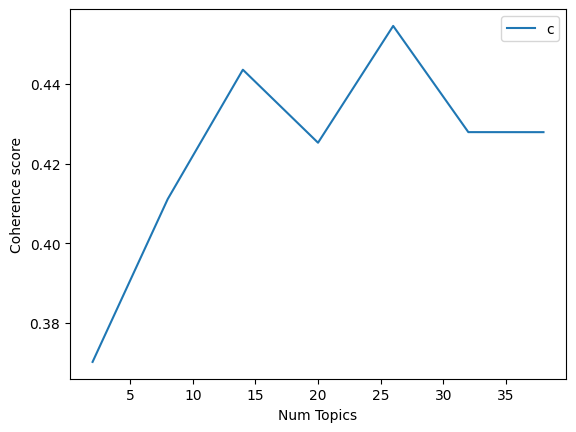

In [24]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary_LDA)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

model_list, coherence_values = compute_coherence_values(dictionary=dictionary_LDA, corpus=corpus, texts=data_lemmatized, start=2, limit=40, step=6)

# Show graph
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()